In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

import data_manager as dm
import myutils

%matplotlib inline

In [2]:
data = dm.get_data_steven_lab()
data2 = dm.get_data_steven_lab("800")
data3 = dm.get_data_steven_lab("900")

In [13]:
accel = data[1][0][0]
accel2 = data2[1][0][0]
accel3 = data3[1][0][0]
six = 5000
eix = 5700


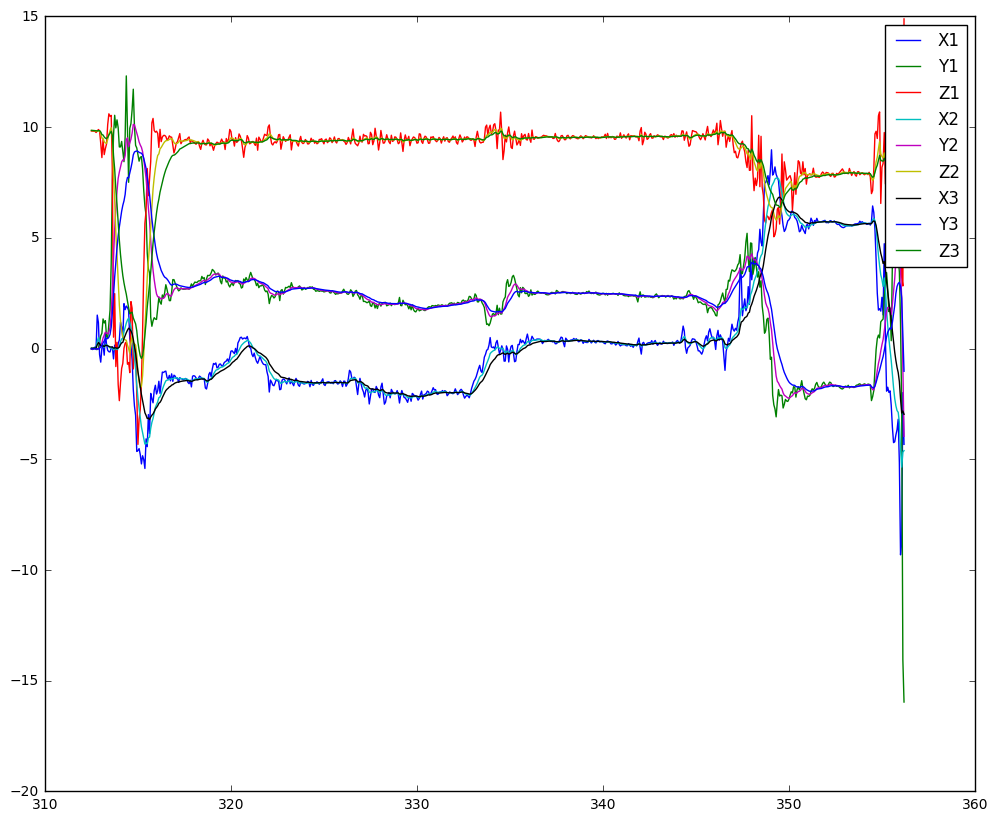

In [14]:
d = accel[six:eix, :]
fig = plt.figure(figsize=(12,10))
subplot = fig.add_subplot(111)        
subplot.plot(d[:, 0], d[:, 1], label='X1')
subplot.plot(d[:, 0], d[:, 2], label='Y1')
subplot.plot(d[:, 0], d[:, 3], label='Z1')

b = myutils.smooth_data(np.copy(accel), 0.8)     
d = b[six:eix, :]
subplot.plot(d[:, 0], d[:, 1], label='X2')
subplot.plot(d[:, 0], d[:, 2], label='Y2')
subplot.plot(d[:, 0], d[:, 3], label='Z2')

c = myutils.smooth_data(np.copy(accel), 0.9)     
d = c[six:eix, :]
subplot.plot(d[:, 0], d[:, 1], label='X3')
subplot.plot(d[:, 0], d[:, 2], label='Y3')
subplot.plot(d[:, 0], d[:, 3], label='Z3')

subplot.legend()
plt.show()


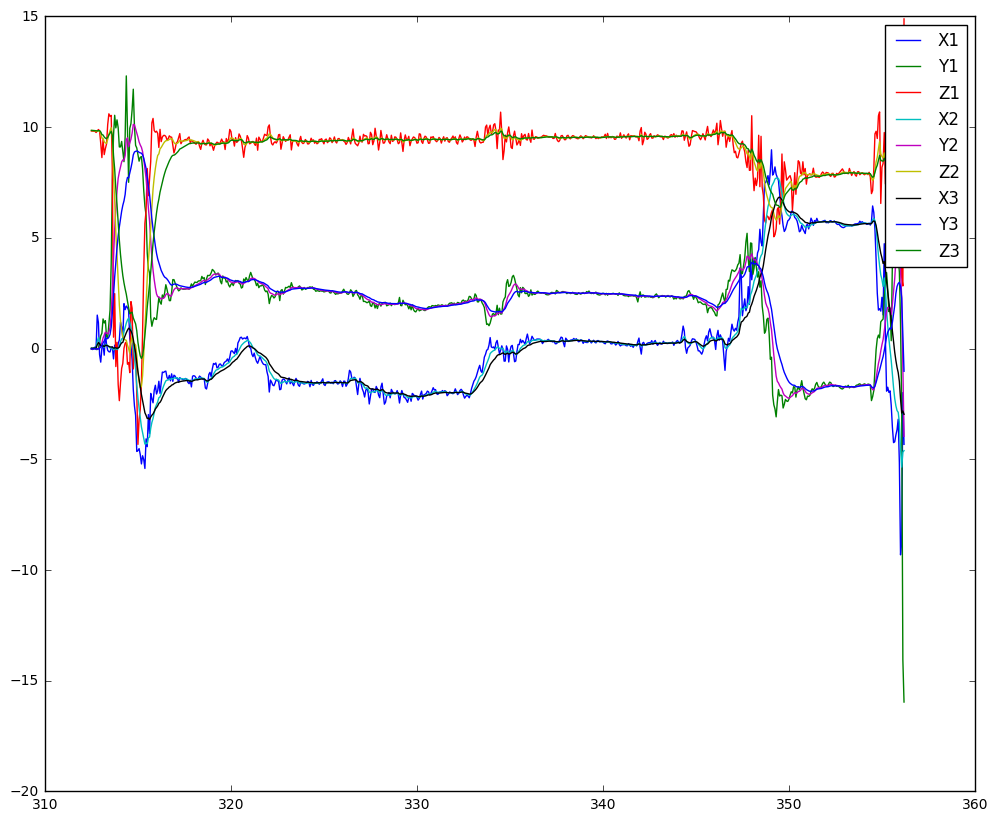

In [15]:
d = accel[six:eix, :]
fig = plt.figure(figsize=(12,10))
subplot = fig.add_subplot(111)        
subplot.plot(d[:, 0], d[:, 1], label='X1')
subplot.plot(d[:, 0], d[:, 2], label='Y1')
subplot.plot(d[:, 0], d[:, 3], label='Z1')

d = accel2[six:eix, :]
subplot.plot(d[:, 0], d[:, 1], label='X2')
subplot.plot(d[:, 0], d[:, 2], label='Y2')
subplot.plot(d[:, 0], d[:, 3], label='Z2')

d = accel3[six:eix, :]
subplot.plot(d[:, 0], d[:, 1], label='X3')
subplot.plot(d[:, 0], d[:, 2], label='Y3')
subplot.plot(d[:, 0], d[:, 3], label='Z3')

subplot.legend()
plt.show()


In [12]:
total_bite = 0
total_drink = 0
total = 0

subject_count = len(data)
for subject in range(subject_count):
    subject_data = data[subject]
    sess_count = len(subject_data)
    for sess in range(sess_count):        
        sess_data = subject_data[sess]        
        a = sess_data[1]
        
        bite = sum(a[:,1]==1)
        drink = sum(a[:,1]==2)
        print("Subject {}, Session {}: Bite {}, Drink {}, Total {}".format(subject, sess, bite, drink, len(a)))
        
        total_bite+=bite
        total_drink+= drink
        total+=len(a)
print("Total Bite {}, Drink {}, Total {}".format(total_bite, total_drink, total))


Subject 0, Session 0: Bite 320, Drink 60, Total 380
Subject 1, Session 0: Bite 32, Drink 10, Total 42
Subject 2, Session 0: Bite 132, Drink 11, Total 143
Subject 2, Session 1: Bite 33, Drink 9, Total 42
Subject 3, Session 0: Bite 106, Drink 3, Total 109
Subject 3, Session 1: Bite 94, Drink 19, Total 113
Subject 4, Session 0: Bite 162, Drink 26, Total 188
Subject 4, Session 1: Bite 60, Drink 29, Total 89
Subject 5, Session 0: Bite 99, Drink 15, Total 114
Subject 5, Session 1: Bite 84, Drink 17, Total 101
Subject 6, Session 0: Bite 34, Drink 0, Total 34
Subject 6, Session 1: Bite 79, Drink 5, Total 84
Total Bite 1235, Drink 204, Total 1439


In [ ]:
data = get_data("steven_free")

In [ ]:
total = np.array([0, 0, 0, 0, 0])

subject_count = len(data)
for subject in range(subject_count):
    subject_data = data[subject]
    sess_count = len(subject_data)
    for sess in range(sess_count):        
        sess_data = subject_data[sess]
        d = sess_data[0]
        annot = sess_data[1]        
        
        counts = np.array([0, 0, 0, 0, 0])
        for i in range(5):
            counts[i] = sum(annot[:, 2]==(i+1))
        
        total = total + counts            
        print("Subject {}, Session {}: ".format(subject, sess), counts)
        print(annot)
        
        fig = plt.figure(figsize=(12,10))
        subplot = fig.add_subplot(111)        
        subplot.plot(d[:, 1], label='X')
        #subplot.plot(d[:, 2], label='Y')
        #subplot.plot(d[:, 3], label='Z')
        subplot.legend()
        
        
        
        r = len(annot)                    
        for i in range(r):            
            ix1 = annot[i, 0]
            ix2 = annot[i, 1]
            meal_type = annot[i, 2]
            
            subplot.plot([ix1, ix1], [-20, 20], c = 'b')
            subplot.plot([ix2, ix2], [-20, 20], c = 'g')
        
        #plt.show()
        plt.savefig("C:\\ASM\\DevData\\eating\\python\\figs\\"+str(subject)+"_"+str(sess)+".png")
        
print("Total: ", total)




In [ ]:
def foo(a):
    a = a*1
    a[1] = 500

a = [10, 20, 30]
foo(a)
print(a)